**Problem Statement**
###### This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of Education , Lunch and Test Preparation course

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
df = pd.read_csv('D:/mlproject_1/notebook/data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df.shape

(1000, 8)

In [10]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [13]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [15]:
df.duplicated().sum()

0

In [16]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [20]:
for col in df.select_dtypes(include='object').columns:
    print(f"value counts in {col}: {len(df[col].value_counts())}")
    print(df[col].value_counts())
    print('='*40)

value counts in gender: 2
gender
female    518
male      482
Name: count, dtype: int64
value counts in race_ethnicity: 5
race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
value counts in parental_level_of_education: 6
parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
value counts in lunch: 2
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
value counts in test_preparation_course: 2
test_preparation_course
none         642
completed    358
Name: count, dtype: int64


In [21]:
df.sample()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
797,female,group E,associate's degree,free/reduced,none,70,84,81


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [23]:
numerical_cols = [col for col in df.columns if df[col].dtype != 'O']
categorical_cols = [col for col in df.columns if df[col].dtype == 'O']

print('we have {} numerical cols : {}'.format(len(numerical_cols), numerical_cols))
print('we have {} categorical cols : {}'.format(len(categorical_cols), categorical_cols))


we have 3 numerical cols : ['math_score', 'reading_score', 'writing_score']
we have 5 categorical cols : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [24]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']

In [25]:
df.sample()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
318,male,group B,bachelor's degree,standard,none,63,71,69,203


In [26]:
df['average'] = df['total_score']/3


In [27]:
df.sample()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
953,male,group C,high school,standard,completed,58,52,54,164,54.666667


In [28]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f"number of students with full marks in Maths : {math_full}")
print(f"number of students with full marks in Reading : {reading_full}")
print(f"number of students with full marks in Writing : {writing_full}")

number of students with full marks in Maths : 7
number of students with full marks in Reading : 17
number of students with full marks in Writing : 14


In [29]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f"Number of students with less than 20 marks in Maths : {math_less_20}")
print(f"Number of students with less than 20 marks in writing : {writing_less_20}")
print(f"Number of students with less than 20 marks in reading : {reading_less_20}")

Number of students with less than 20 marks in Maths : 4
Number of students with less than 20 marks in writing : 3
Number of students with less than 20 marks in reading : 1


### Data vizualization

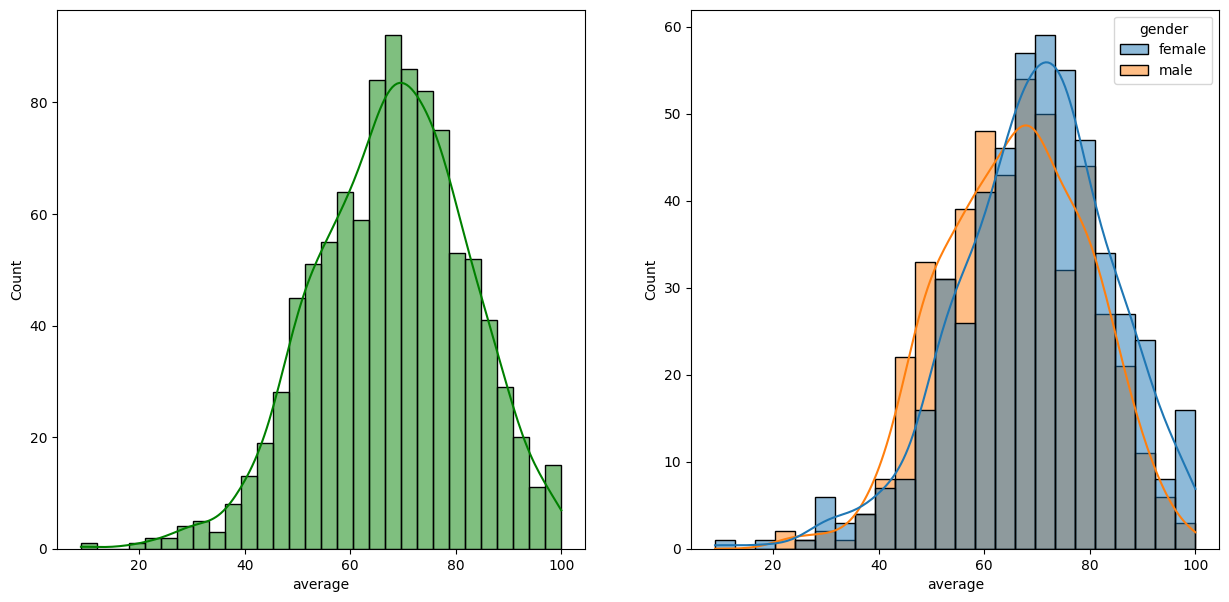

In [36]:
fig, axs  =plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()


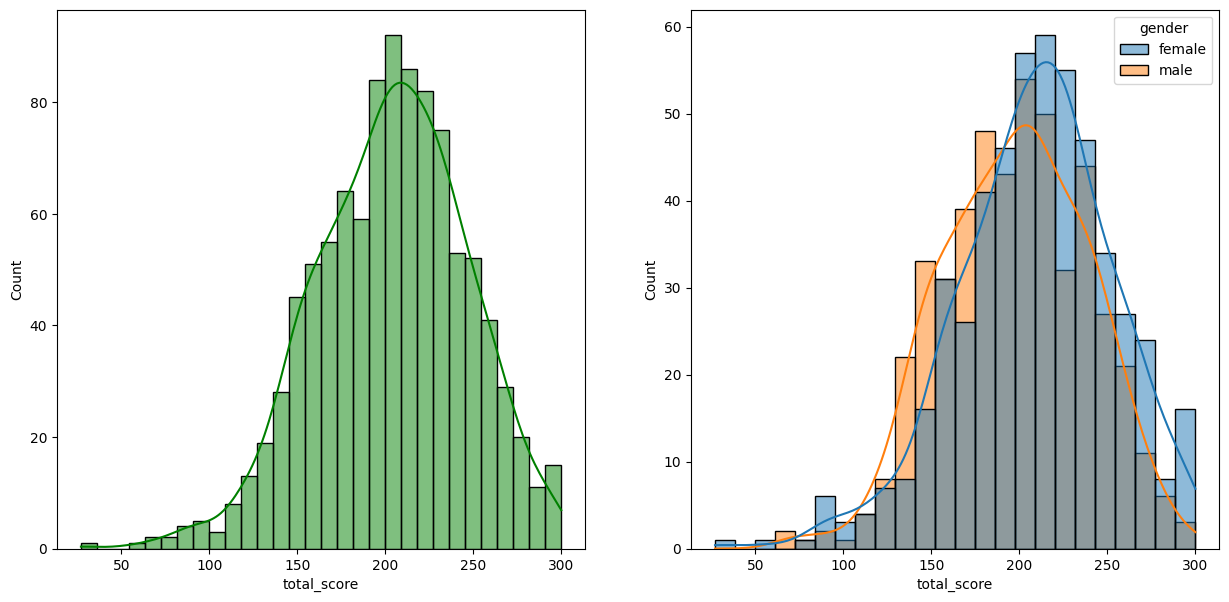

In [37]:
fig, axs  =plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')
plt.show()

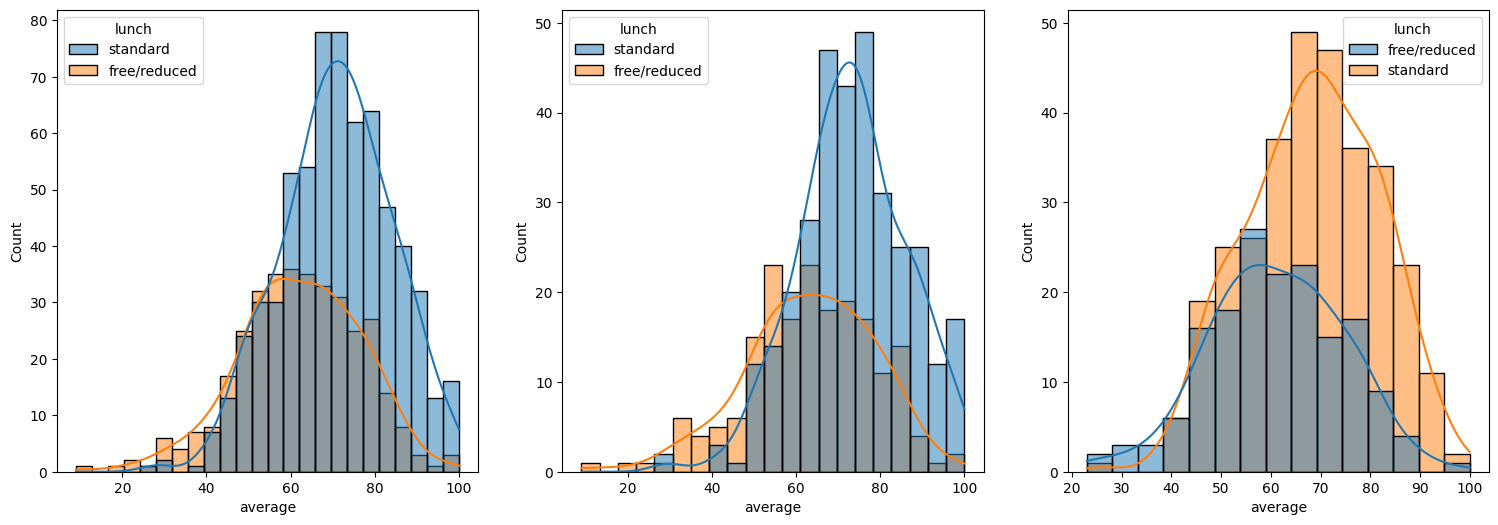

In [38]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')
plt.show()



In [39]:
df_dummies = pd.get_dummies(df, drop_first=True)

In [40]:
df_dummies.head()

,math_score,reading_score,writing_score,total_score,average,gender_male,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_standard,test_preparation_course_none
0,72,72,74,218,72.666667,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,247,82.333333,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,278,92.666667,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,148,49.333333,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,229,76.333333,True,False,True,False,False,False,False,False,True,False,True,True


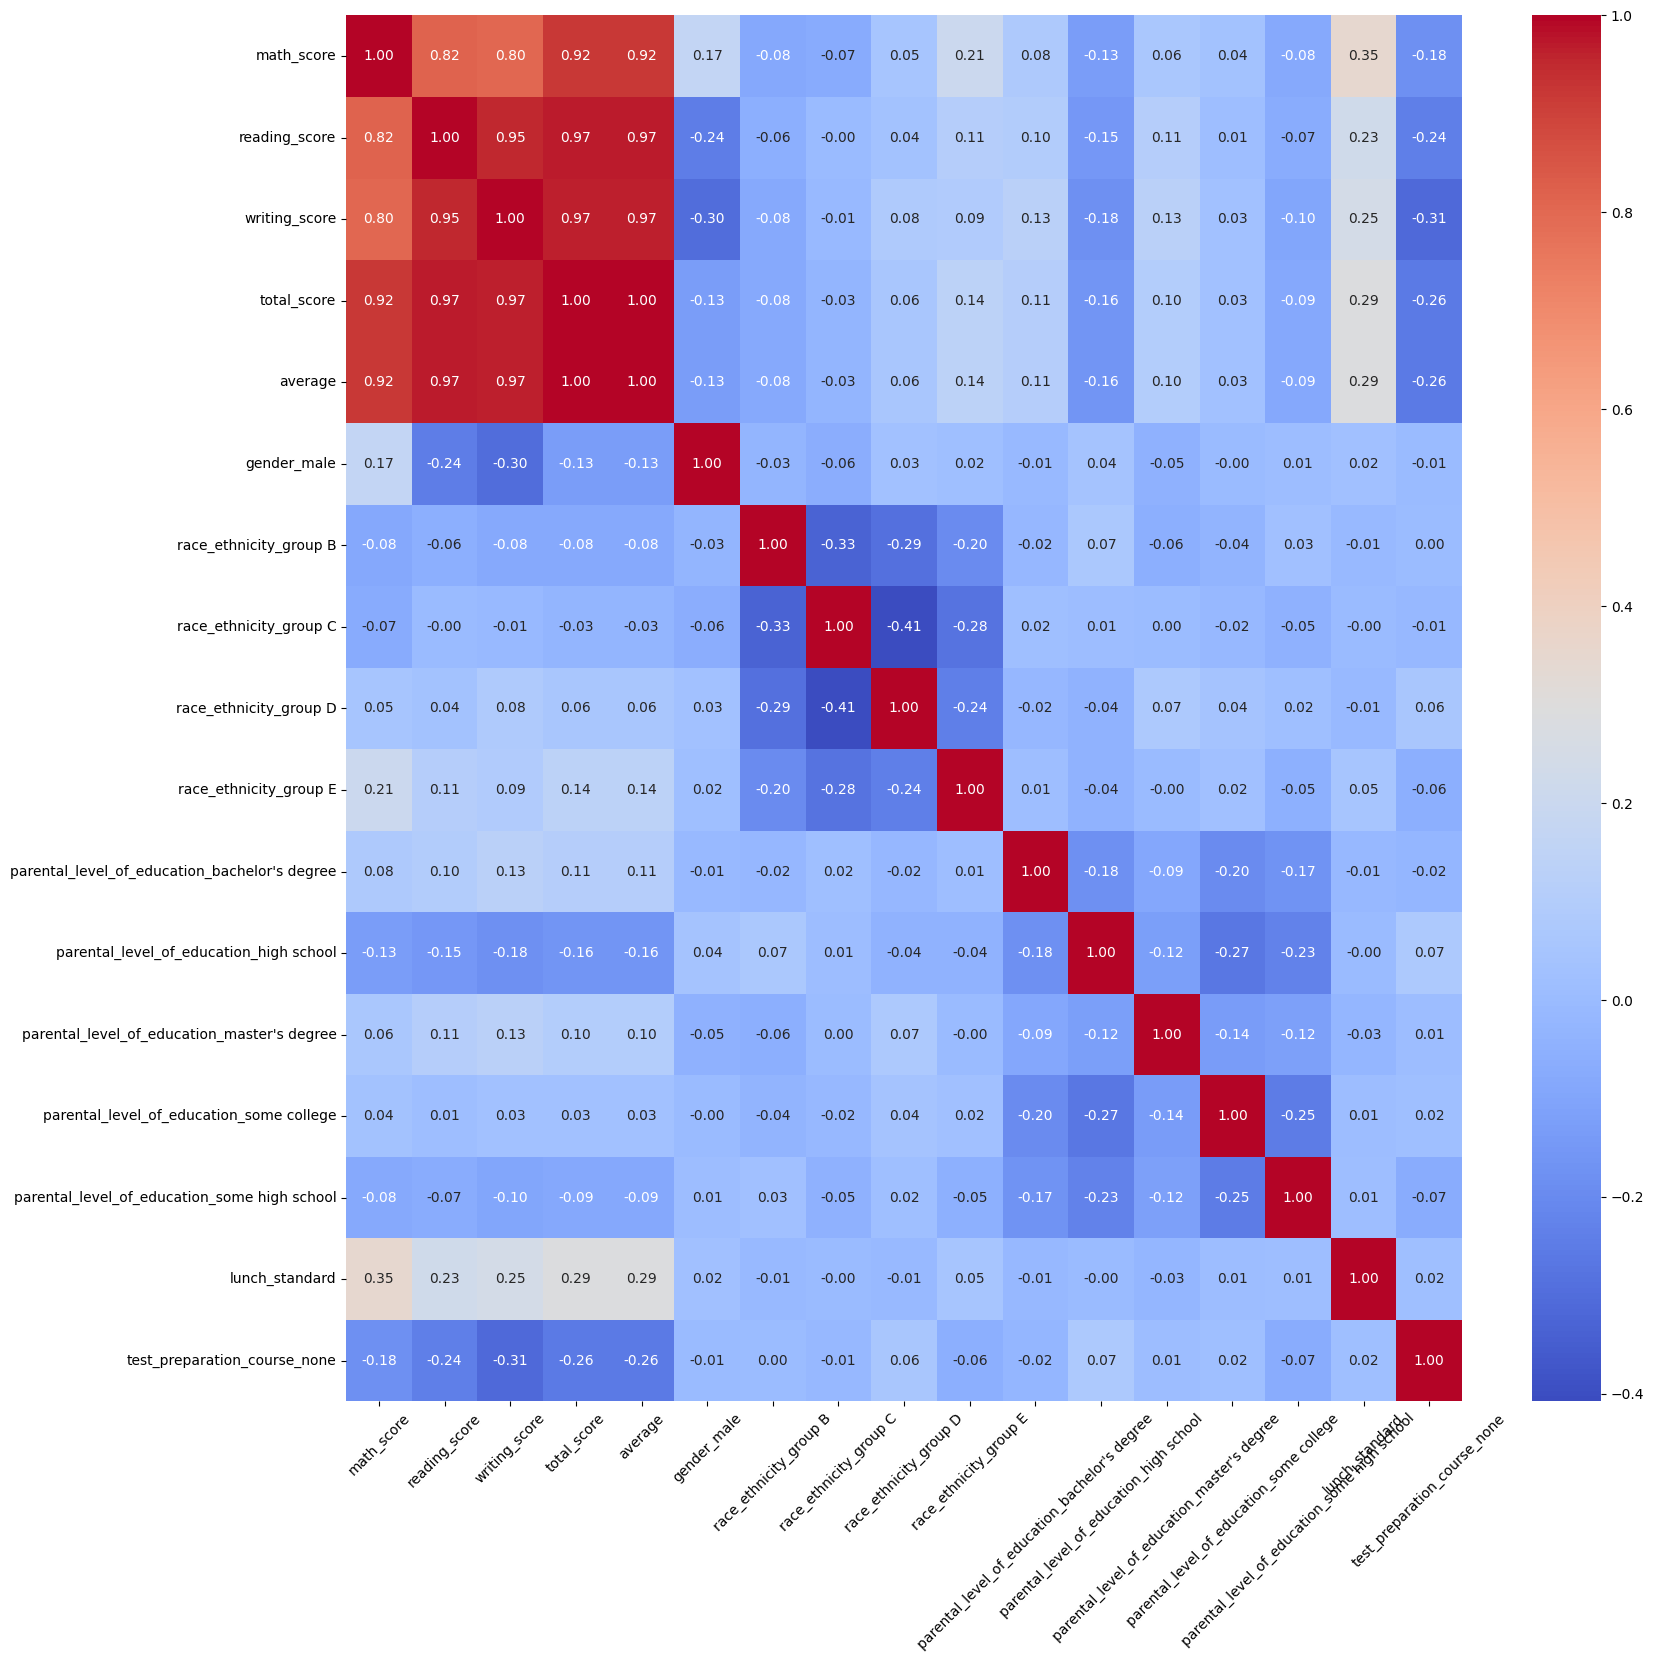

In [42]:
plt.figure(figsize=(18,18))
sns.heatmap(df_dummies.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.xticks(rotation=45)
plt.show()